### Import libraries 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn import datasets
from sklearn.datasets.samples_generator import make_blobs
import math

### Generated random data

We generate random data from $L^2$. The main problem is classifying each point to the correct plane.  

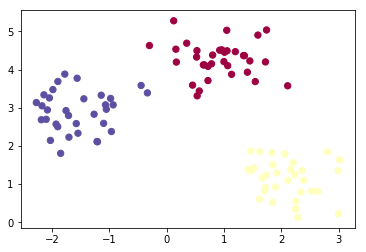

In [2]:
%matplotlib inline

X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0 , cluster_std = 0.5)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

### Convert labels to the binary format 

In [3]:
bry = []
for i in y:
    if i == 0:
        bry.append([1.0 , 0.0 , 0.0])
    elif i== 1 :
        bry.append([0.0 , 1.0 , 0.0])
    else:
        bry.append([0.0 , 0.0 , 1.0])
bry = np.array(bry)

### Add 1 for bias 

In [4]:
X=np.insert(X, 0, values=1.0, axis=1)

### Create the model hyper-parameters 

The network will have a linear model with no hidden layer. Then input is 3 neurons and the output is one neuron. 

Initialize random weights and biases

In [5]:
m = X.shape[0]
n = X.shape[1]
nclasses = 3

W = np.random.randn(n,nclasses)

### The loss function 

The loss function is the cross intropy loss 

$$L = -\sum_{k} y_k \log(p_k) $$
Where the soft max function 
$$p_k = \frac{e^{o_k}}{\sum_i e^{o_i}}$$

In [6]:
def loss(X,y,W , a = 0):
    return -np.sum(np.log(soft_max(np.dot(X,W)))*y)+ a * np.sum(W**2)
        

In [7]:
def soft_max(X):
    exp  = np.exp(X)
    summ = np.sum(exp, axis=1)
    return exp/summ[:, np.newaxis]

### The math behind the optimization 

We are trying to optimize the function 

$$L(W) = -\sum_{k} y_k \log \left( \frac{e^{W_kx}}{\sum_i e^{W_i x}} \right)$$

For some $m$ crossponding to the true class

$$L(W_m) = -W_m x - \log\left(\sum_i e^{W_i x} \right)$$

$$\frac{\partial L}{\partial W_{mj}} = - x + x p_j$$
$$\frac{\partial L}{\partial W_{kj}} =  x p_j$$

cobining these we have 

$$\frac{\partial L}{\partial W} = x^T (p-y)$$


In [8]:
def evaluate_gradient(X,y,W , a = 0):
    g  = soft_max(np.dot(X,W))
    dW = np.dot(X.T, g-y)
    return dW + 2* a * W

### Training 
For training we randomly choose a point from the training data and we repreeat the process for 10,000 iterations. Note that the learning rate is small to compenceate for the large data points. We could've normalized the data points to set a smaller learning rate. 

In [9]:
def train(X , y, W , lr =1e-2 , itr = 1000):
    for j in range(0, itr):
        #calculate the analytical gradient 
        dW = evaluate_gradient(X,y,W)
        W = W - dW * lr 
        if(j%100 == 0):
            print("Loss is ", loss(X,y,W))
    return W

In [10]:
What = train(X,bry,W)

Loss is  119.810181191
Loss is  3.23529828142
Loss is  2.23063164356
Loss is  1.79448358134
Loss is  1.53514379891
Loss is  1.35769916147
Loss is  1.22614605822
Loss is  1.12340842242
Loss is  1.04019518341
Loss is  0.970953938393


In [11]:
def predict(X,W):
    g  = soft_max(np.dot(X,W))
    yhat = np.argmax(g,axis=1)
    return yhat

In [12]:
def accuracy(yhat , y):
    diff = y-yhat 
    num_corr  = len(y) - np.count_nonzero(diff)
    print("Accuracy is " , float(num_corr)/len(y))

In [13]:
yhat = predict(X,What)
accuracy(yhat , y)

Accuracy is  1.0


In [14]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    inp = np.c_[xx.ravel(), yy.ravel()]
    inp = np.insert(inp, 0, values=1.0, axis=1)
    # Predict the function value for the whole gid
    Z = pred_func(inp)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)

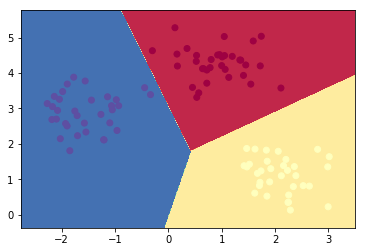

In [15]:
plot_decision_boundary(lambda x: predict(x,What))

### Concolusion 
* To lower the loss lower the learning rate
* Use different learning rate for different optimization parameters aka (W,b)
* Maybe if the data is normailzed we will need the same learning rate 